<a href="https://colab.research.google.com/github/Yuva486/CODSOFT/blob/main/CODSOFT_TASK_3_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Developer name : Yuva Sree Pandala     
Batch : october-november    
 Domain : Data Science     
 Task : Iris Flower Classification**

In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
!pip install --upgrade matplotlib
!pip install seaborn

In [178]:
#IMPORT DATASET
df=pd.read_csv('/content/IRIS.csv')

In [179]:
#DESCRIBING DATASET
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [180]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [182]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [183]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

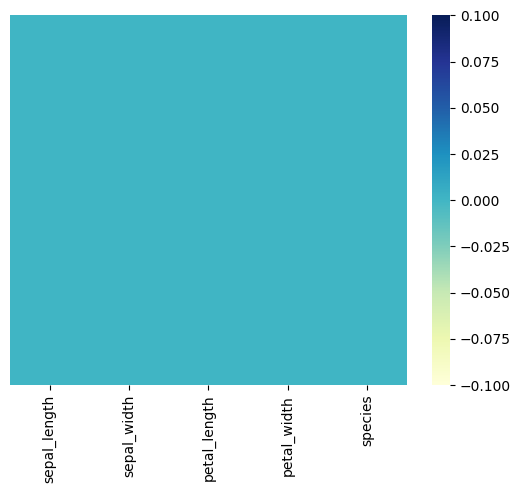

In [184]:
#REPRESENTATION OF NULL VALUES
sns.heatmap(df.isnull(),yticklabels=False,cmap='YlGnBu')

<ipython-input-185-f0d43f69b86d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


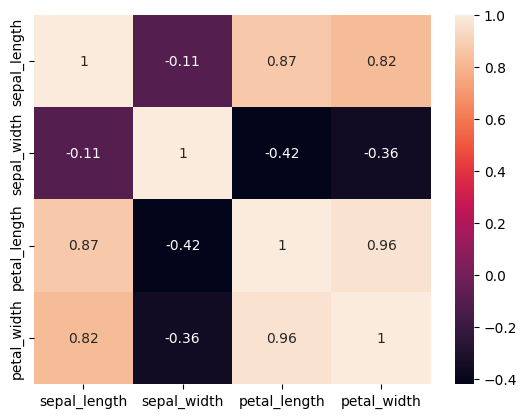

In [185]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
%matplotlib inline

<Axes: ylabel='Frequency'>

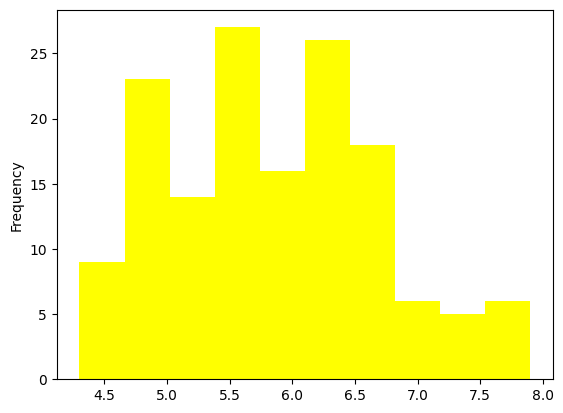

In [186]:
df['sepal_length'].plot.hist(color="yellow")

<Axes: ylabel='Frequency'>

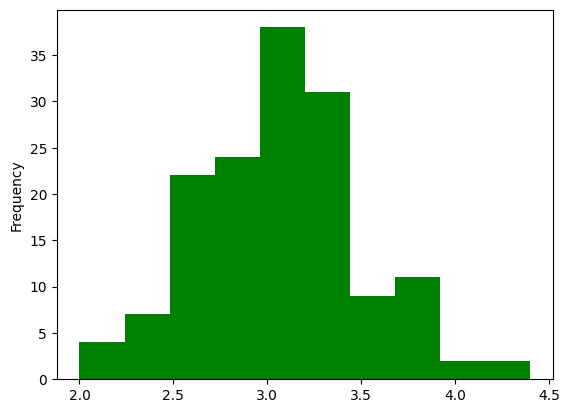

In [187]:
df['sepal_width'].plot.hist(color="green")

<Axes: ylabel='Frequency'>

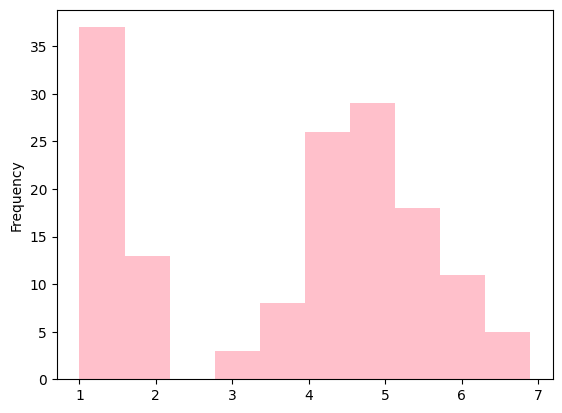

In [188]:
df['petal_length'].plot.hist(color="pink")

<Axes: ylabel='Frequency'>

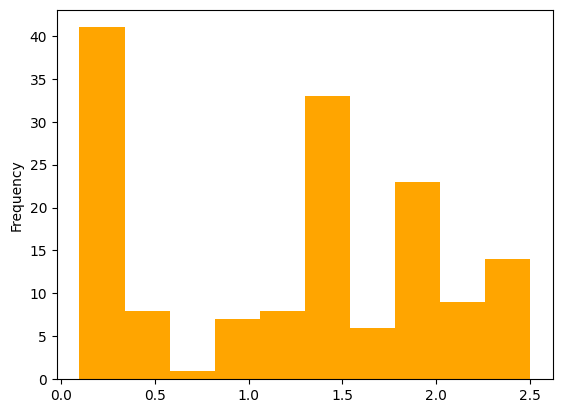

In [189]:
df['petal_width'].plot.hist(color="orange")

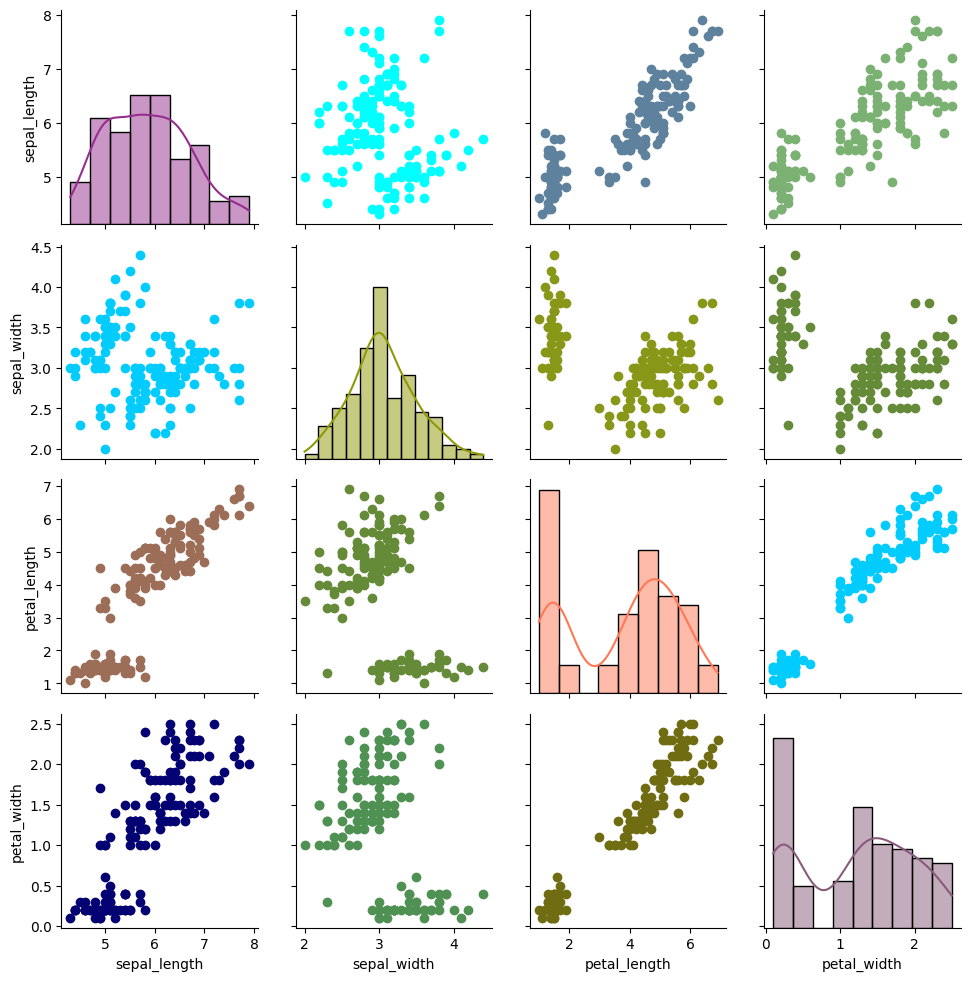

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = iter(['xkcd:warm purple','xkcd:baby poop green','xkcd:melon','xkcd:dusky purple','xkcd:bright sky blue','xkcd:brownish','xkcd:moss green','xkcd:deep blue','xkcd:light forest green','xkcd:brown green','xkcd:cyan','xkcd:greyish blue','xkcd:faded green','xkcd:baby shit green','xkcd:moss green','xkcd:bright sky blue','xkcd:light peach'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x, y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    sns.histplot(x, kde=True, **kwargs)

iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)


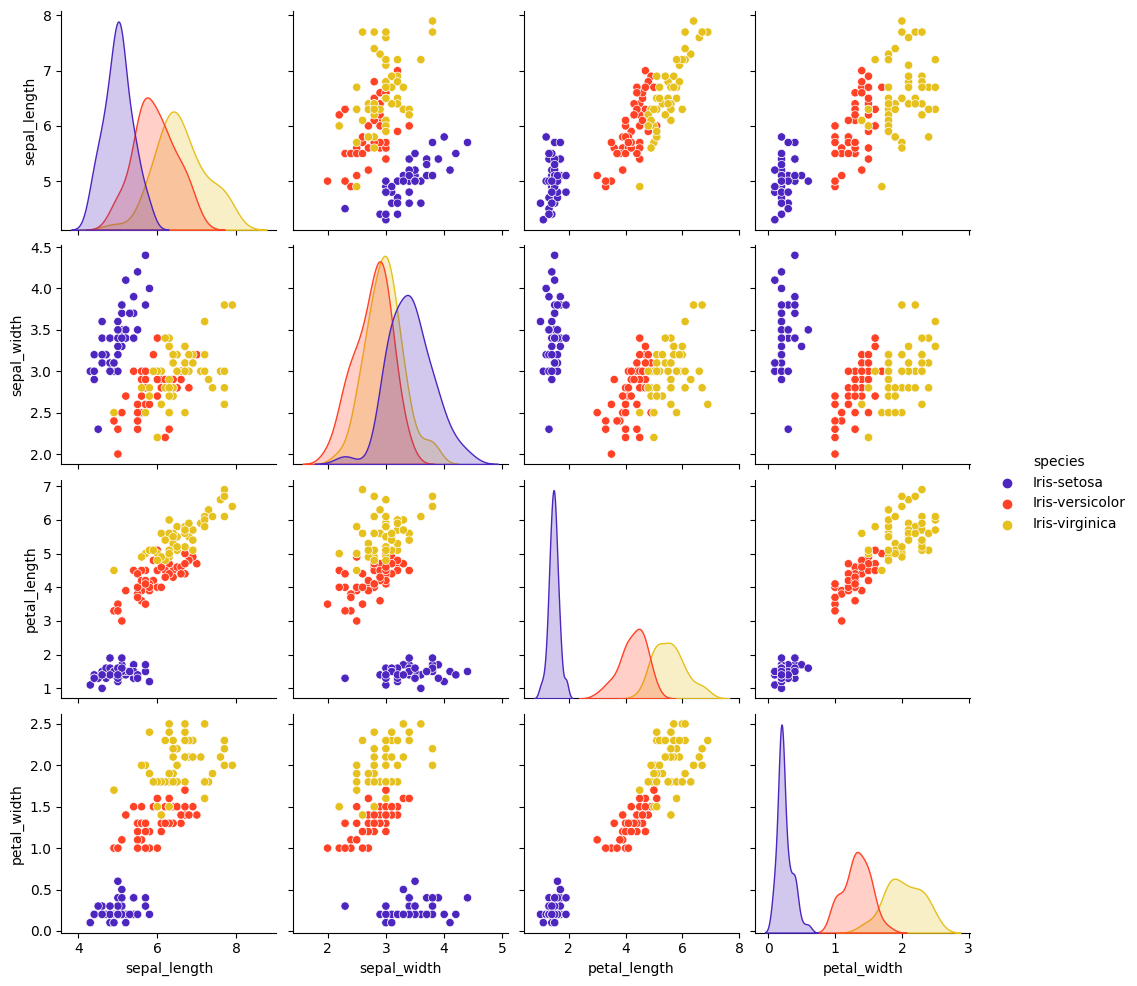

In [191]:
sns.pairplot(df,diag_kind='kde',hue='species',palette='CMRmap')

<Axes: xlabel='species', ylabel='Count'>

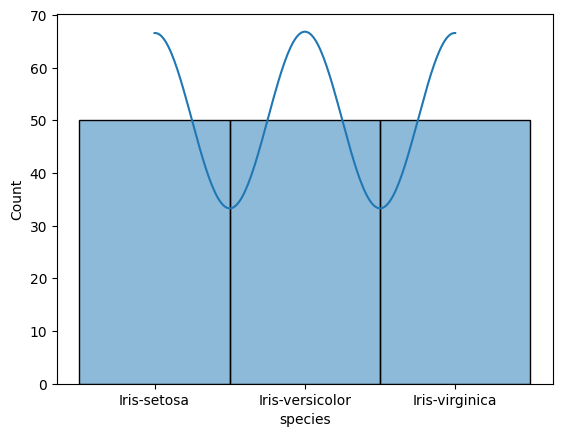

In [192]:
sns.histplot(df['species'],kde=True)

<Axes: xlabel='species', ylabel='sepal_length'>

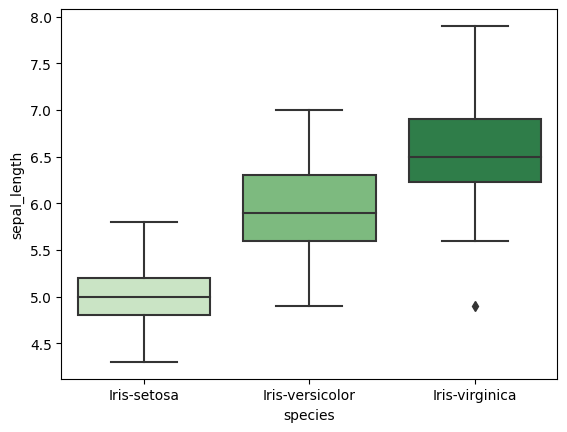

In [193]:
sns.boxplot(x='species',y='sepal_length',data=df , palette="Greens")

<Axes: xlabel='species', ylabel='sepal_width'>

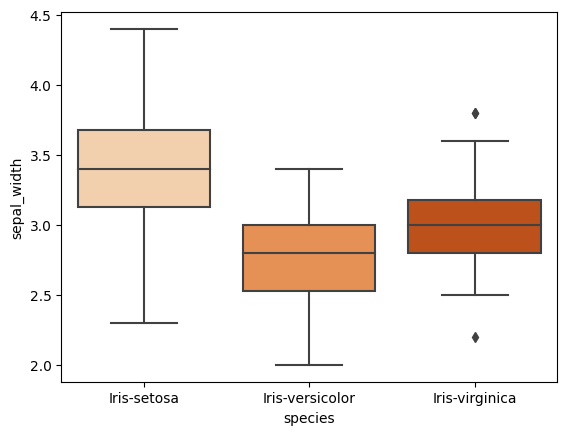

In [194]:
sns.boxplot(x='species',y='sepal_width',data=df , palette="Oranges")

<Axes: xlabel='species', ylabel='petal_length'>

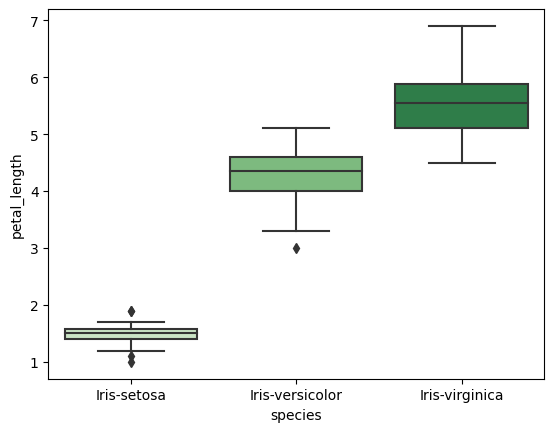

In [195]:
sns.boxplot(x='species',y='petal_length',data=df , palette="Greens")

<Axes: xlabel='species', ylabel='petal_width'>

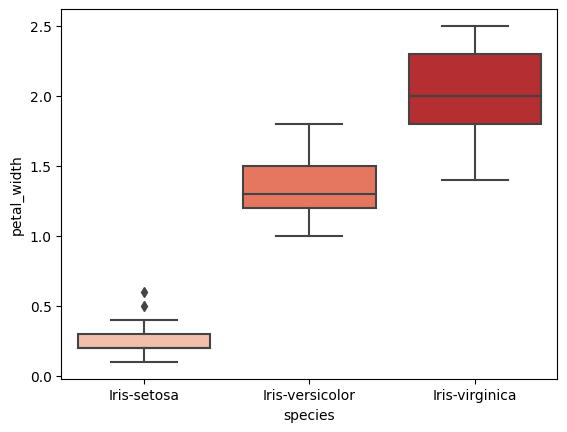

In [196]:
sns.boxplot(x='species',y='petal_width',data=df , palette="Reds")

In [197]:
df['species'].replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'],value=[1,2,3])

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [198]:
#DEFINE TARGET VARIABLE Y AND FEATURE X
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [199]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
x.shape

(150, 4)

In [200]:
y=df['species']
y.shape

(150,)

In [201]:
#TRAIN TEST SPLIT DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [202]:
#LOGISTIC REGRESSION MODEL
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [203]:
svc.intercept_

array([ 0.12841898, -0.04518037,  0.09266086])

In [204]:
#PREDICT TEST DATA
y_pred=svc.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [205]:
#MODEL ACCURACY
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        14\nIris-versicolor       0.90      1.00      0.95         9\n Iris-virginica       1.00      0.95      0.98        22\n\n       accuracy                           0.98        45\n      macro avg       0.97      0.98      0.97        45\n   weighted avg       0.98      0.98      0.98        45\n'

In [206]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 21]])

In [207]:
accuracy_score(y_test,y_pred)*100

97.77777777777777

In [208]:
#TAKING INPUT FROM USER FOR PREDICTING ABOUT NEW FLOWER
sepal_len=float(input("Enter the length of the sepal:"))
sepal_wid=float(input("Enter the width of the sepal:"))
petal_len=float(input("Enter the length of the sepal:"))
petal_wid=float(input("Enter the width of the sepal:"))
user_inp={'sepal_length':sepal_len,'sepal_width':sepal_wid,'petal_length':petal_len,'petal_width':petal_wid,}
user=pd.DataFrame(user_inp,index=[1])
print("The details you entered are:\n",user)
ypred2=svc.predict(user)
ypred2

Enter the length of the sepal:2.2
Enter the width of the sepal:3.3
Enter the length of the sepal:4.2
Enter the width of the sepal:4
The details you entered are:
    sepal_length  sepal_width  petal_length  petal_width
1           2.2          3.3           4.2          4.0


array(['Iris-virginica'], dtype=object)